<a href="https://colab.research.google.com/github/aydanazar/ULTRAsound/blob/ayda/models/Baseline_Binary_Classification_(Tumor_vs_No_Tumor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import re
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
benign_dir = "drive/MyDrive/281/data/benign/"
malignant_dir = "drive/MyDrive/281/data/malignant/"
normal_dir = "drive/MyDrive/281/data/normal/"

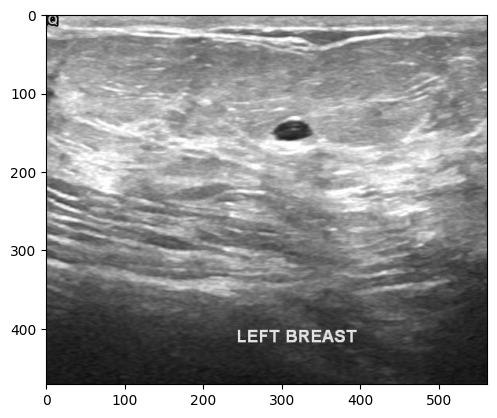

In [ ]:
plt.imshow(plt.imread(benign_dir + "benign (1).png"))

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

train_data = image_dataset_from_directory(
                  "drive/MyDrive/281/data/",
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  label_mode='categorical',
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory("drive/MyDrive/281/data/",
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [ ]:
print(train_data.class_names)

['benign', 'malignant', 'normal']


In [ ]:
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [ ]:
epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/2
40/40 [==============================] - 49s 1s/step - loss: 1.0664 - accuracy: 0.5297 - val_loss: 0.8004 - val_accuracy: 0.6698
Epoch 2/2
40/40 [==============================] - 47s 1s/step - loss: 0.6720 - accuracy: 0.7015 - val_loss: 0.7070 - val_accuracy: 0.6952


In [ ]:
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/2
40/40 [==============================] - 52s 1s/step - loss: 0.5284 - accuracy: 0.7546 - val_loss: 0.6743 - val_accuracy: 0.7302
Epoch 2/2
40/40 [==============================] - 51s 1s/step - loss: 0.4186 - accuracy: 0.8171 - val_loss: 0.7979 - val_accuracy: 0.7651


In [ ]:
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/2
40/40 [==============================] - 51s 1s/step - loss: 0.3348 - accuracy: 0.8702 - val_loss: 0.7565 - val_accuracy: 0.6857
Epoch 2/2
40/40 [==============================] - 49s 1s/step - loss: 0.2368 - accuracy: 0.9074 - val_loss: 0.8411 - val_accuracy: 0.7683


In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

# Two Part Baseline Model

In [ ]:
benign_non_mask = [benign_dir + filename for filename in os.listdir(benign_dir) if filename.find("mask") == -1]
malignant_non_mask = [malignant_dir + filename for filename in os.listdir(malignant_dir) if filename.find("mask") == -1]
normal_non_mask = [normal_dir + filename for filename in os.listdir(normal_dir) if filename.find("mask") == -1]
tumor_files = benign_non_mask + malignant_non_mask
print(len(tumor_files), len(normal_non_mask))


647 133


## 1. Tumor vs. No Tumor

In [ ]:
X = []
y = []

for im in tumor_files:
  img = load_img(im, target_size=(224, 224))
  img = img_to_array(img)
  X.append(img)
  y.append(1)

for im in normal_non_mask:
  img = load_img(im, target_size=(224, 224))
  img = img_to_array(img)
  X.append(img)
  y.append(0)

X = np.stack(X)
y = np.array(y).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,
                                                    random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True,
                                                  random_state=42, stratify=y_train)

In [ ]:
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # layers.Conv2D(32, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),

  # layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=["accuracy"])

In [ ]:
epochs = 3
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size)

Epoch 1/3
18/18 [==============================] - 25s 1s/step - loss: 1.4900 - accuracy: 0.7576 - val_loss: 0.5004 - val_accuracy: 0.8254
Epoch 2/3
18/18 [==============================] - 22s 1s/step - loss: 0.4059 - accuracy: 0.8307 - val_loss: 0.4202 - val_accuracy: 0.8254
Epoch 3/3
18/18 [==============================] - 25s 1s/step - loss: 0.3307 - accuracy: 0.8503 - val_loss: 0.3753 - val_accuracy: 0.8413


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size)

Epoch 1/3
18/18 [==============================] - 23s 1s/step - loss: 0.2428 - accuracy: 0.8984 - val_loss: 0.3170 - val_accuracy: 0.8571
Epoch 2/3
18/18 [==============================] - 22s 1s/step - loss: 0.1601 - accuracy: 0.9465 - val_loss: 0.3388 - val_accuracy: 0.8571
Epoch 3/3
18/18 [==============================] - 22s 1s/step - loss: 0.0903 - accuracy: 0.9768 - val_loss: 0.4056 - val_accuracy: 0.8571


In [ ]:
np.sum(y_val)/X_val.shape[0] # severely imbalanced dataset!!!! look into under/oversampling techniques???

0.8253968253968254

## 2. Malignant vs. Benign

In [ ]:
X = []
y = []

for im in malignant_non_mask:
  img = load_img(im, target_size=(224, 224))
  img = img_to_array(img)
  X.append(img)
  y.append(1) # 1 is for malignant

for im in benign_non_mask:
  img = load_img(im, target_size=(224, 224))
  img = img_to_array(img)
  X.append(img)
  y.append(0) # 0 is for benign

X = np.stack(X)
y = np.array(y).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,
                                                    random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True,
                                                  random_state=42, stratify=y_train)

In [ ]:
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # layers.Conv2D(32, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),

  # layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=["accuracy"])

In [ ]:
epochs = 3
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size)

Epoch 1/3
15/15 [==============================] - 20s 1s/step - loss: 1.5861 - accuracy: 0.6753 - val_loss: 0.5718 - val_accuracy: 0.7308
Epoch 2/3
15/15 [==============================] - 18s 1s/step - loss: 0.4877 - accuracy: 0.7785 - val_loss: 0.6909 - val_accuracy: 0.6923
Epoch 3/3
15/15 [==============================] - 20s 1s/step - loss: 0.3870 - accuracy: 0.8559 - val_loss: 0.4211 - val_accuracy: 0.8269


In [ ]:
epochs = 3
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size)

Epoch 1/3
15/15 [==============================] - 20s 1s/step - loss: 0.2536 - accuracy: 0.9140 - val_loss: 0.3910 - val_accuracy: 0.8846
Epoch 2/3
15/15 [==============================] - 21s 1s/step - loss: 0.1787 - accuracy: 0.9355 - val_loss: 0.3744 - val_accuracy: 0.8654
Epoch 3/3
15/15 [==============================] - 19s 1s/step - loss: 0.1272 - accuracy: 0.9806 - val_loss: 0.5073 - val_accuracy: 0.7692


In [ ]:
# TODO: try testing the second model on the output of the first model